In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import geopandas as gpd

In [3]:
workforce_ratio = pd.read_csv("Resources/Workforce_ratio_df.csv")
correl_table = pd.read_csv("Resources/correl_table.csv")
correl_table_complete = pd.merge(workforce_ratio, correl_table, how="inner", on=["Country", "Country"])

In [4]:
correl_table_complete

,Unnamed: 0,Country,2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],Workforce Ratio Five Year Average,Workforce Ratio Five Year Median,Workforce Ratio Five Year Max,Workforce Ratio Five Year Min,Workforce Ratio Five Year STD,Happy,Economy,Family,Health,Freedom,Trust,Generous
0,0,Afghanistan,24.620070,26.284064,28.063156,28.666658,28.925233,27.311836,28.063156,28.925233,24.620070,1.823801,3.51280,0.357113,0.409753,0.254707,0.117924,0.058094,0.267730
1,1,Albania,72.226226,72.149044,72.171071,72.305482,72.345436,72.239452,72.226226,72.345436,72.149044,0.084583,4.71260,0.938633,0.754931,0.787696,0.371898,0.043201,0.167887
2,2,Algeria,22.520465,22.261553,21.916027,21.559497,21.647083,21.980925,21.916027,22.520465,21.559497,0.407161,5.66760,1.012963,1.074205,0.665057,0.178437,0.146099,0.069219
3,5,Angola,96.157006,96.179759,96.280556,96.405459,96.480934,96.300743,96.280556,96.480934,96.157006,0.140659,3.87225,0.798380,0.938368,0.133902,0.027433,0.071570,0.105269
4,8,Argentina,65.752821,66.817133,67.879334,69.798936,69.738757,67.997396,67.879334,69.798936,65.752821,1.783463,6.45940,1.111035,1.330960,0.760895,0.481620,0.064308,0.092371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,252,Uruguay,74.152614,75.254588,75.431714,75.651143,75.799193,75.257850,75.431714,75.799193,74.152614,0.651828,6.43120,1.135558,1.315312,0.782929,0.574978,0.188516,0.169011
139,253,Uzbekistan,67.537971,67.400367,67.291839,67.184301,67.054138,67.293723,67.291839,67.537971,67.054138,0.187355,6.04620,0.723758,1.434100,0.591725,0.655988,0.267424,0.327523
140,256,Vietnam,87.987174,88.249817,88.181686,88.221322,88.277505,88.183501,88.221322,88.277505,87.987174,0.115339,5.15460,0.723416,1.138384,0.722700,0.577207,0.091921,0.195664
141,261,Zambia,87.439009,87.833617,88.313809,88.846524,88.990346,88.284661,88.313809,88.990346,87.439009,0.658236,4.58440,0.571761,0.932381,0.302761,0.462099,0.097337,0.218430


In [5]:
def linreg(x_values, y_values, title, coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coordinates,fontsize=15,color="red")
    plt.xlabel('Happy')
    plt.ylabel(title)
    print(f"The r squared value is: {rvalue}")
    plt.show() 

The r squared value is: 0.8289882046904636


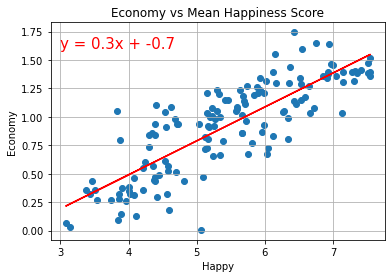

In [6]:
correl_table_complete.plot(kind='scatter', x='Happy', y='Economy')
plt.title("Economy vs Mean Happiness Score")
plt.grid()
x_values = correl_table_complete["Happy"]

y_values = correl_table_complete["Economy"]
linreg(correl_table_complete["Happy"],correl_table_complete["Economy"], "Economy", (3, 1.6))


The r squared value is: 0.7556695571726786


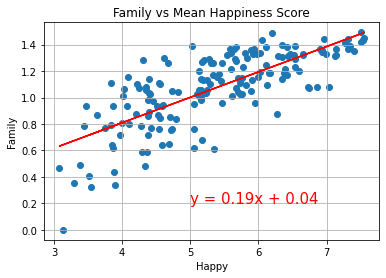

In [7]:
correl_table.plot(kind='scatter', x='Happy', y='Family')
plt.title("Family vs Mean Happiness Score")

plt.grid()
x_values = correl_table["Happy"]

y_values = correl_table["Family"]
linreg(correl_table["Happy"],correl_table["Family"], "Family", (5, 0.2))


The r squared value is: 0.8012330463722879


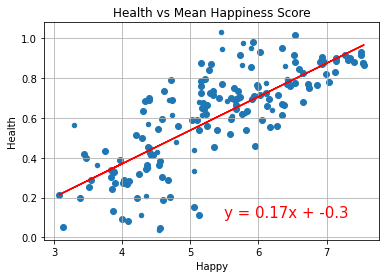

In [8]:
correl_table.plot(kind='scatter', x='Happy', y='Health')
plt.title("Health vs Mean Happiness Score")

plt.grid()
x_values = correl_table_complete["Happy"]

y_values = correl_table_complete["Health"]
linreg(correl_table_complete["Happy"],correl_table_complete["Health"], "Health", (5.5, 0.1))


The r squared value is: 0.5890615071276682


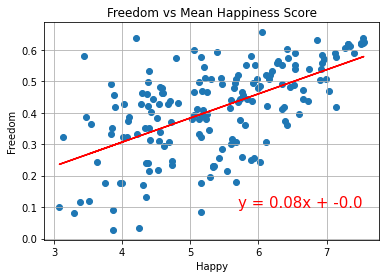

In [9]:
correl_table.plot(kind='scatter', x='Happy', y='Freedom')
plt.title("Freedom vs Mean Happiness Score")

plt.grid()
x_values = correl_table["Happy"]

y_values = correl_table["Freedom"]
linreg(correl_table["Happy"],correl_table["Freedom"], "Freedom", (5.7, 0.1))

The r squared value is: 0.37700234805940314


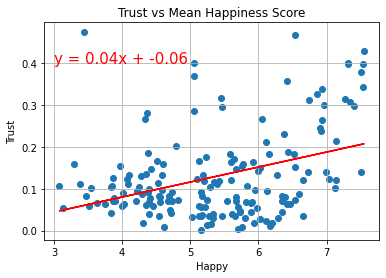

In [10]:
correl_table.plot(kind='scatter', x='Happy', y='Trust')
plt.title("Trust vs Mean Happiness Score")

plt.grid()
x_values = correl_table["Happy"]

y_values = correl_table["Trust"]
linreg(correl_table["Happy"],correl_table["Trust"], "Trust", (3, 0.4))


The r squared value is: 0.1417041750637647


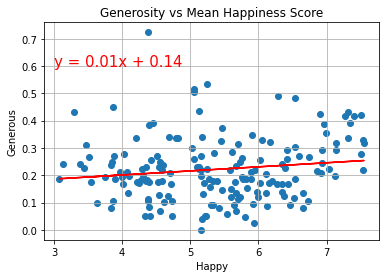

In [11]:
correl_table.plot(kind='scatter', x='Happy', y='Generous')
plt.title("Generosity vs Mean Happiness Score")

plt.grid()
x_values = correl_table["Happy"]

y_values = correl_table["Generous"]
linreg(correl_table["Happy"],correl_table["Generous"], "Generous", (3, 0.6))


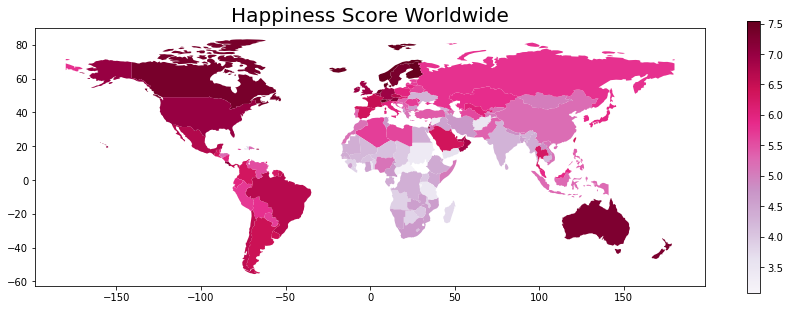

In [14]:
#Cite: https://geopandas.org/mapping.html
happiness_df = correl_table.reset_index()

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
country = world.rename(columns={'name': 'Country'}).set_index("Country")
geo_world = country.rename(index={"Central African Rep.": "Central African Republic", "Czechia": "Czech Republic", "Dominican Rep.": "Dominican Republic", "Macedonia": "North Macedonia", "Palestine": "Palestinian Territories", "Sudan": "South Sudan", "United States of America": "United States", "Dem. Rep. Congo": "Congo (Kinshasa)"}).reset_index()

for_plotting = pd.merge(geo_world, happiness_df, on='Country', how='right')

ax = for_plotting.plot(column='Happy', cmap ='PuRd', figsize=(15,5), legend = True)
ax.set_title('Happiness Score Worldwide', fontdict= 
            {'fontsize':20})

plt.savefig("Analysis_Figures_Images/Happiness_Score_Worldwide_Choropleth.png")
plt.show()
